<h1>بسم الله الرحمن الرحيم</h1>
<h2>Analyzing anime and manga datasets</h2>

<h3>link of the datasets<h3>
<a href="https://www.kaggle.com/datasets/nikhil1e9/myanimelist-anime-and-manga">click me</a>

<h2>first we will go through the anime dataset</h2>

<h3>1st of the data analysis lifecycle is ask</h3>
<p>so we need to ask ourselves a questions according to this datasets</p>
<ul>
  <li>which anime have the most number of members who watched it</li>
  <li>which anime type have better rank or higher score</li>
  <li>which year that have the most number of anime ranked and watched</li>
  <li>did the anime popularity increased through years or not</li>
  <li>did the number of episodes effect the rank and the score of that anime or not</li>
  <li>which range of episode number ave the most number of members watchin it</li>
</ul>

<h3>2nd of the data analysis lifecycle is prepare the data</h3>

<p>so first we gonna import all the libraries we need for the analysis<p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<p>then we gonna read the dataset by using the file path</p>

In [5]:
anime_dataset = pd.read_csv("archive (1)//MAL-anime.csv")
anime_dataset.head()

,Unnamed: 0,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55
1,1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55
2,2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29
3,3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36
4,4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44


In [7]:
anime_dataset.shape

(12774, 10)

In [8]:
anime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12774 entries, 0 to 12773
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12774 non-null  int64  
 1   Title       12774 non-null  object 
 2   Rank        12774 non-null  int64  
 3   Type        12774 non-null  object 
 4   Episodes    12774 non-null  object 
 5   Aired       12774 non-null  object 
 6   Members     12774 non-null  int64  
 7   page_url    12774 non-null  object 
 8   image_url   12774 non-null  object 
 9   Score       12774 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 998.1+ KB


In [9]:
anime_dataset.describe()

,Unnamed: 0,Rank,Members,Score
count,12774.000000,12774.000000,1.277400e+04,12774.000000
mean,6386.500000,6397.824409,7.080744e+04,6.475332
std,3687.680504,3690.509535,2.140947e+05,0.942195
min,0.000000,1.000000,1.810000e+02,1.850000
25%,3193.250000,3204.250000,1.455000e+03,5.840000
50%,6386.500000,6399.500000,6.566500e+03,6.500000
75%,9579.750000,9592.750000,4.066725e+04,7.170000
max,12773.000000,12788.000000,3.759013e+06,9.100000


<h3>Data cleaning</h3>

In [11]:
anime_dataset.drop_duplicates(inplace = True)
anime_dataset.shape

(12774, 10)

In [15]:
anime_dataset = anime_dataset.rename(columns={anime_dataset.columns[0]: 'drop'})
anime_dataset.drop(['drop','page_url','image_url'],axis =1,inplace = True)
anime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12774 entries, 0 to 12773
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     12774 non-null  object 
 1   Rank      12774 non-null  int64  
 2   Type      12774 non-null  object 
 3   Episodes  12774 non-null  object 
 4   Aired     12774 non-null  object 
 5   Members   12774 non-null  int64  
 6   Score     12774 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 798.4+ KB


In [28]:
pattern = r"\b\d{4}\b"

# Use str.contains() to check which rows match the pattern
mask = anime_dataset['Aired'].str.contains(pattern)

# Use boolean indexing to select the rows that match the pattern
matched_df = anime_dataset[mask]

# Use boolean indexing to select the rows that do not match the pattern
unmatched_df = anime_dataset[~mask]

# Print the rows that do not match the pattern
print("Rows with issues:")
print(unmatched_df)

Rows with issues:
                                                   Title   Rank     Type  \
142        Honoo no Alpenrose: Ai no Symphony Ongaku-hen  10208      OVA   
1698   Tottoko Hamtarou no Tottoko Taisetsu!! Koutsuu...   7883      OVA   
2357                                    Katsudou Shashin  10962    Movie   
5413   Mahou no Princess Minky Momo: Yume wo Dakishim...   8804  Special   
6014                                              Hanako   9879    Movie   
6760                                       Burutabu-chan  11222       TV   
8026                                    Saru Kani Gassen  12122    Movie   
10953                  Captain Tsubasa no Shouka Sakusen   8261      OVA   

      Episodes Aired  Members  Score  
142          1     -      514   5.68  
1698         1     -      591   6.20  
2357         1     -     7595   5.46  
5413         3     -      708   6.01  
6014         1     -     1503   5.76  
6760         ?     -      276   5.37  
8026         1     -    

In [30]:
anime_dataset = anime_dataset.drop(anime_dataset[anime_dataset['Aired'] == '-'].index)

In [31]:
import re

release_date = []
for x in anime_dataset['Aired']:
    pattern = r"\b\d{4}\b"
    matches = re.search(pattern, x)
    if matches:
        year = matches[0]
        release_date.append(year)
print(release_date[:10])   
print(len(release_date))

['2017', '1997', '2015', '2001', '2018', '1970', '2017', '2006', '2011', '2003']
12766


In [32]:
anime_dataset['Aired'] = release_date

In [33]:
anime_dataset.shape

(12766, 7)

<h3>3rd of the data analysis lifecycle is procces</h3>

<h3>Exploratory Data analysis</h3>

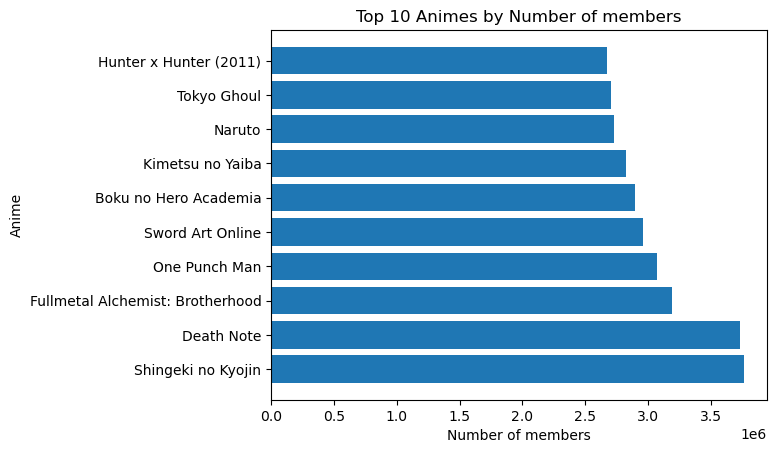

In [39]:
top_10 = anime_dataset.nlargest(10, 'Members')
plt.barh(top_10['Title'], top_10['Members'])
plt.title('Top 10 Animes by Number of members')
plt.xlabel('Number of members')
plt.ylabel('Anime')
plt.show()

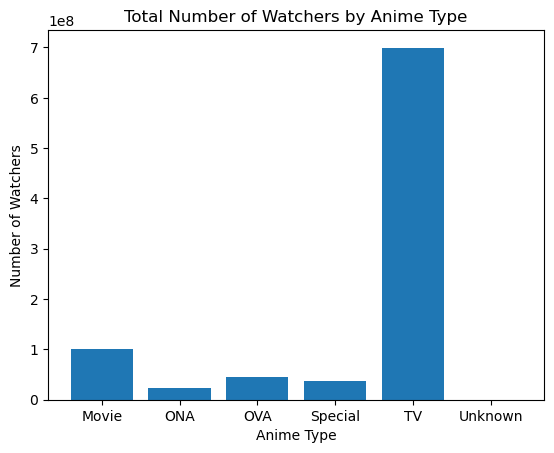

In [42]:
type_watchers = anime_dataset.groupby('Type')['Members'].sum()
plt.bar(type_watchers.index, type_watchers.values)
plt.title('Total Number of Watchers by Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Number of Watchers')
plt.show()

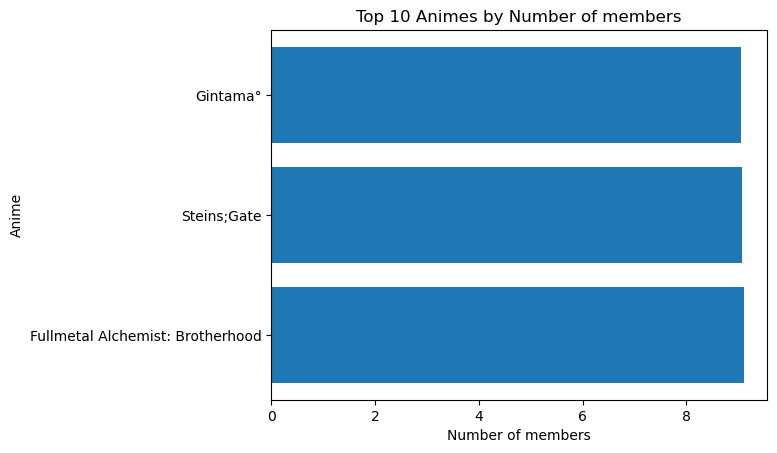

In [47]:
top_10 = anime_dataset.nlargest(3, 'Score')
plt.barh(top_10['Title'], top_10['Score'])
plt.title('Top 10 Animes by Number of members')
plt.xlabel('Number of members')
plt.ylabel('Anime')
plt.show()

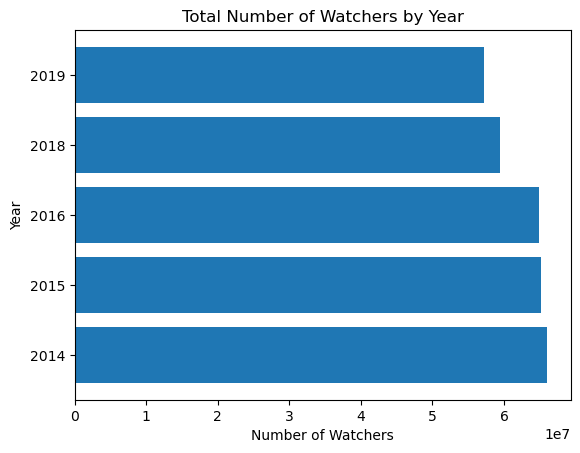

In [55]:
year_watchers = anime_dataset.groupby('Aired')['Members'].sum()
top_5_years = year_watchers.nlargest(5)
plt.barh(top_5_years.index, top_5_years.values)
plt.title('Total Number of Watchers by Year')
plt.xlabel('Number of Watchers')
plt.ylabel('Year')
plt.show()

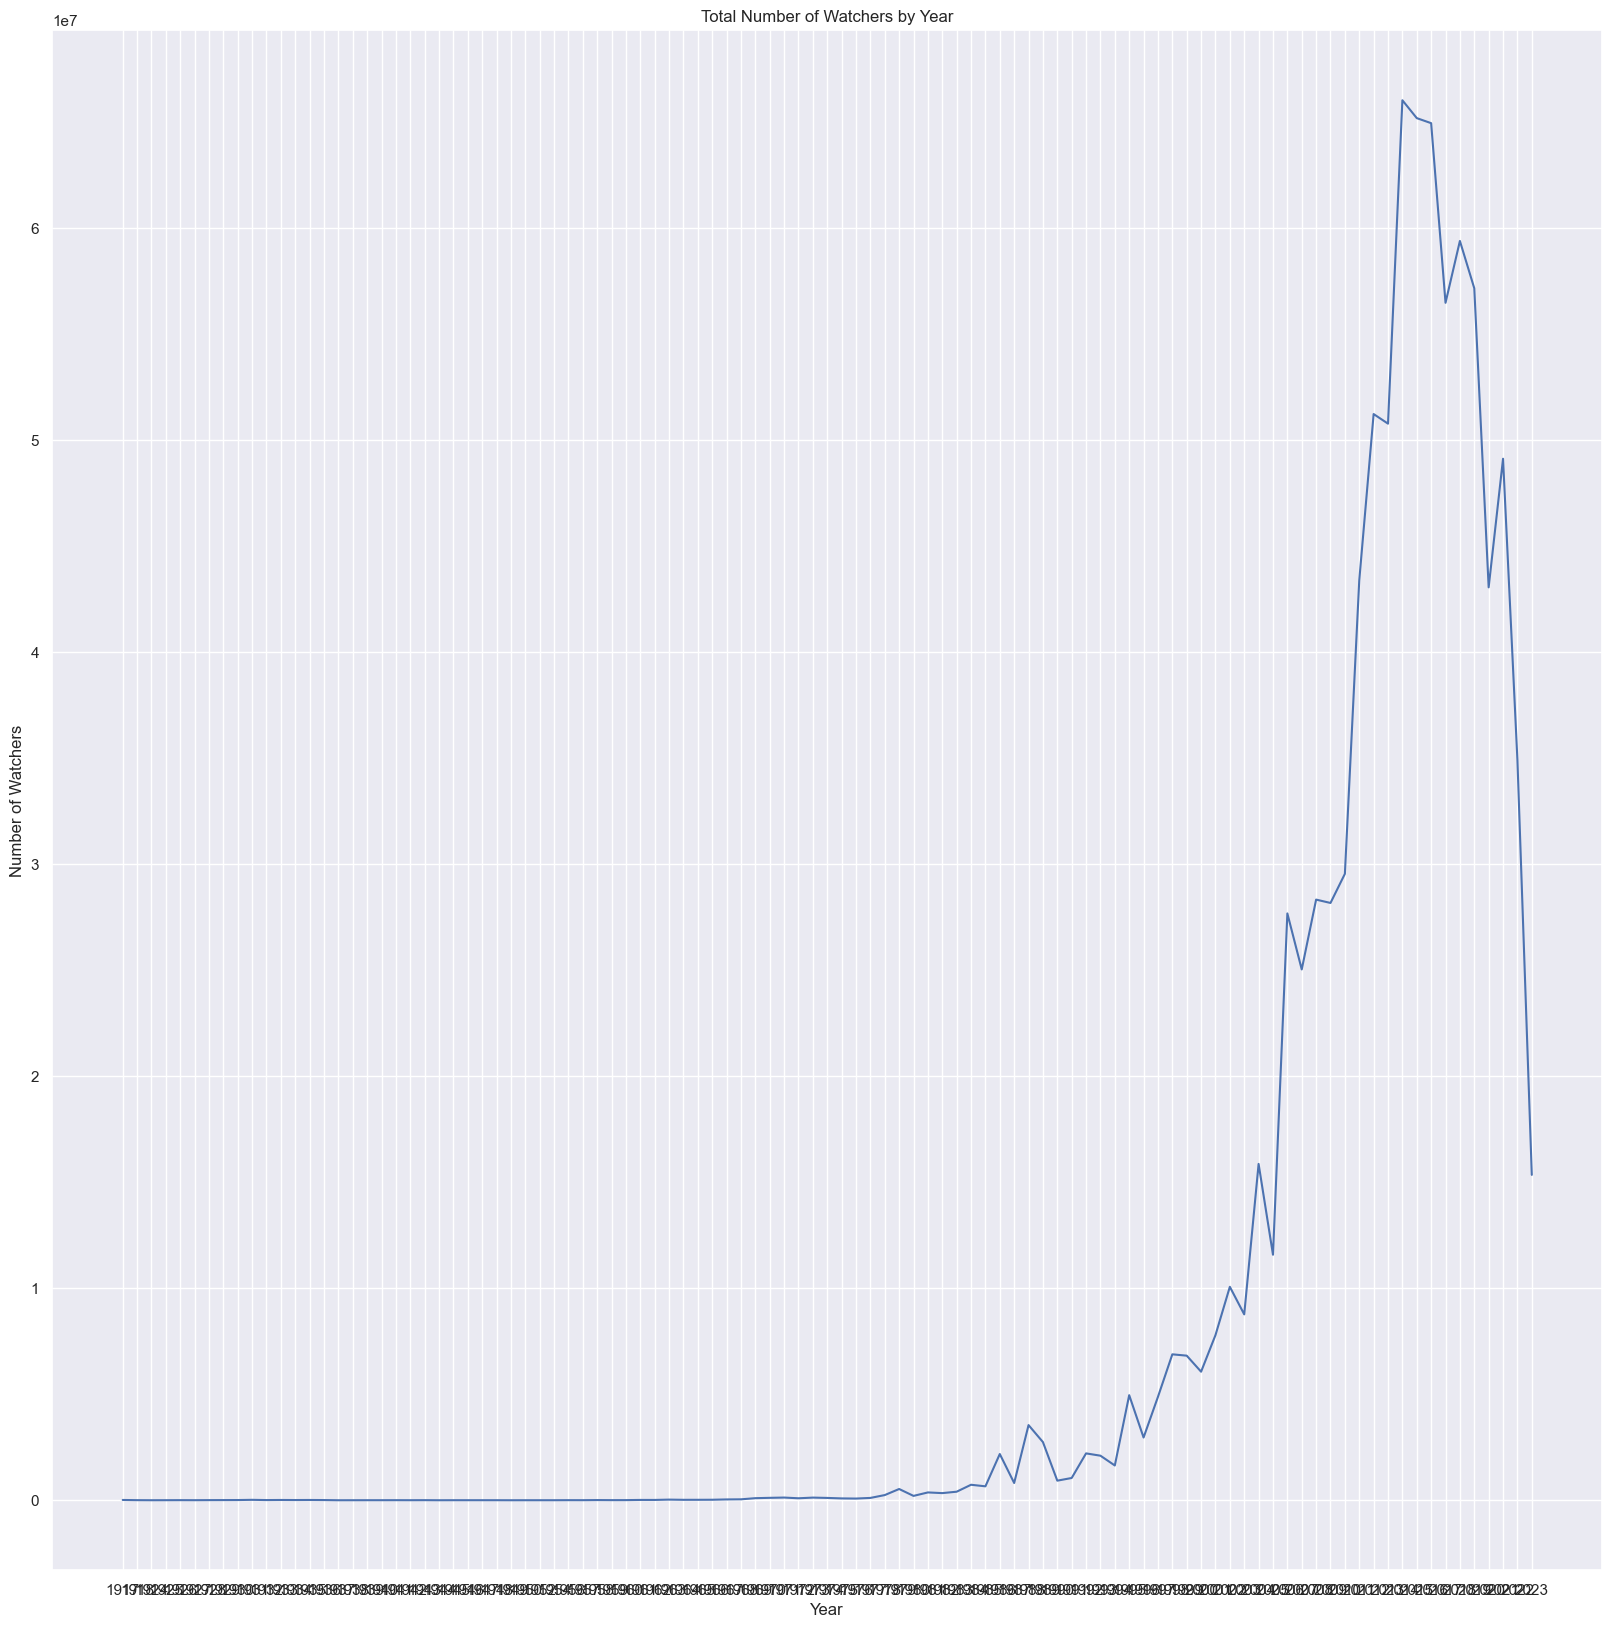

In [59]:
year_watchers = anime_dataset.groupby('Aired')['Members'].sum()
plt.plot(year_watchers.index, year_watchers.values)
sns.set(rc={'figure.figsize':(20,20)})
plt.title('Total Number of Watchers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Watchers')
sns.set_style("whitegrid")
plt.show()

<Axes: xlabel='Score', ylabel='Members'>

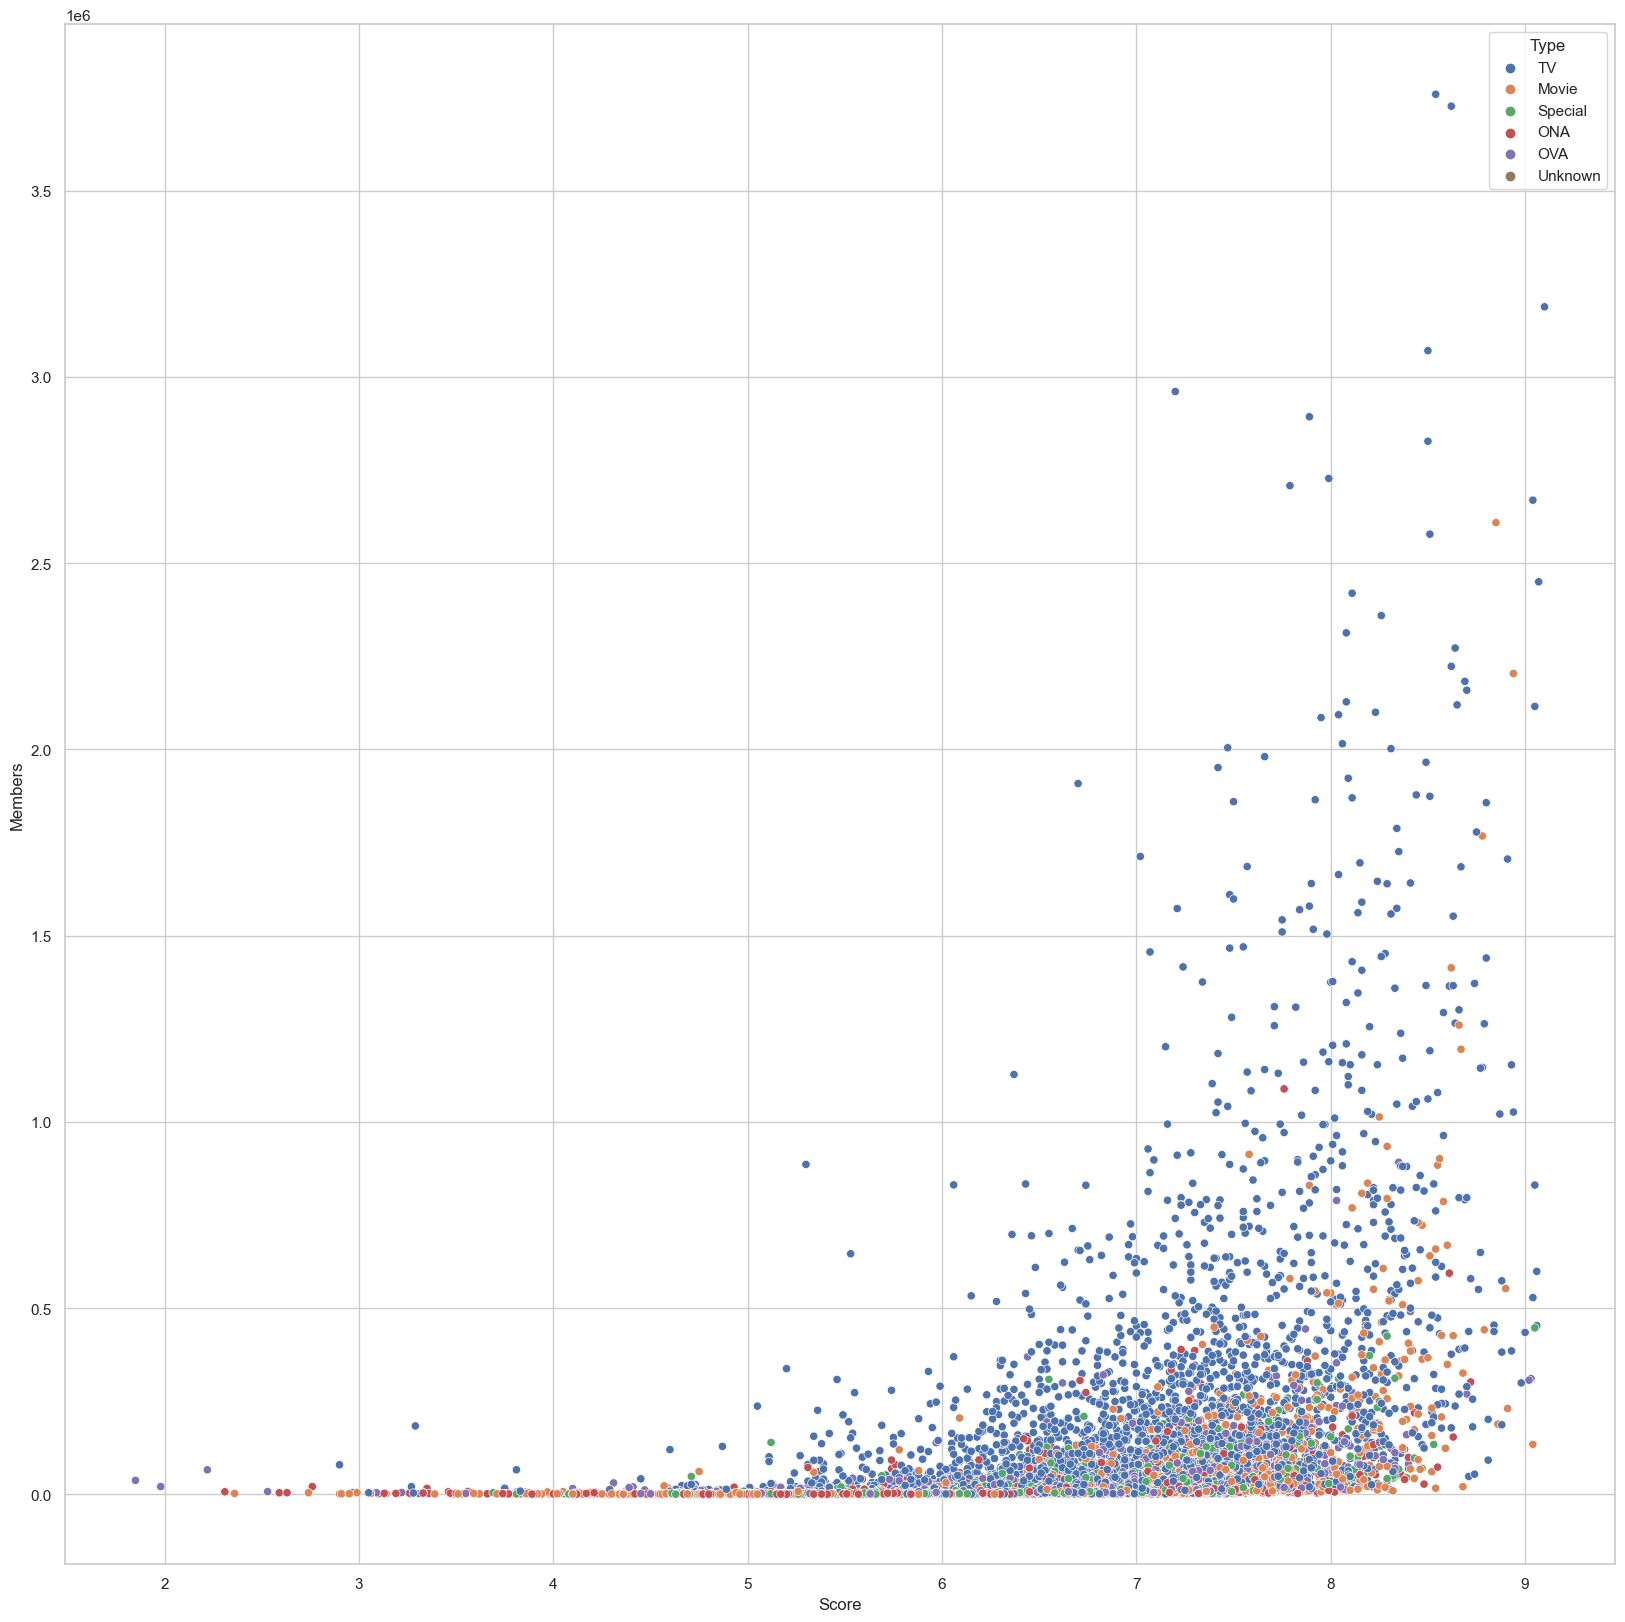

In [60]:
sns.scatterplot(x='Score', y='Members', hue='Type', data=anime_dataset)

<h2>as it shows the TV type anime is the most rated anime among the rest of the other types</h2>